In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [96]:
df_train=pd.read_excel('./train.xlsx',index_col=0)
df_test = pd.read_excel('./test.xlsx',index_col=0)

In [97]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [98]:
df_train = df_train.drop(['index','회사명', '거래소코드', '회계년도','K2_부실판단', '산업위험_경기민감도','주거래은행'],axis=1)
df_test = df_test.drop(['index','회사명', '거래소코드', '회계년도','K2_부실판단', '산업위험_경기민감도','주거래은행'],axis=1)

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7371 entries, 0 to 7370
Data columns (total 91 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   유동비율(%)                     7371 non-null   float64
 1   당좌비율(%)                     7371 non-null   float64
 2   비유동비율(%)                    7371 non-null   float64
 3   부채비율(%)                     7371 non-null   float64
 4   유동부채비율(%)                   7371 non-null   float64
 5   차입금의존도(%)                   7371 non-null   float64
 6   이익잉여금비율(%)                  7371 non-null   float64
 7   순운전자본비율(%)                  7371 non-null   float64
 8   비유동장기적합률(%)                 7371 non-null   float64
 9   이자보상배율(이자비용)(배)             7371 non-null   float64
 10  외화포지션(배)                    7371 non-null   float64
 11  총자본순이익률(%)                  7371 non-null   float64
 12  자기자본순이익률(%)                 7371 non-null   float64
 13  경영자본순이익률(%)                 7371 

### Scailing : Standard scale

In [100]:
selected_columns =  ['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
    '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
    '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
    '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
    '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
    '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
    '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
    'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
    '총자본투자효율(%)', 'log_평균총자산', 'K2_score']# 수치형 데이터 컬럼의 인덱스를 넣어주세요.

# StandardScaler 객체를 생성합니다.
scaler = StandardScaler()

# 데이터프레임의 선택된 수치형 데이터 컬럼에 스탠다드 스케일링을 적용하고, 새로운 컬럼에 저장합니다.
df_train_2 = df_train .copy()  # 원본 데이터프레임을 복사합니다.
df_train_2[selected_columns] = scaler.fit_transform(df_train [selected_columns])
df_test_2 = df_test .copy()  # 원본 데이터프레임을 복사합니다.
df_test_2[selected_columns] = scaler.transform(df_test[selected_columns])


In [101]:
df_train_2.columns

Index(['유동비율(%)', '당좌비율(%)', '비유동비율(%)', '부채비율(%)', '유동부채비율(%)', '차입금의존도(%)',
       '이익잉여금비율(%)', '순운전자본비율(%)', '비유동장기적합률(%)', '이자보상배율(이자비용)(배)',
       '외화포지션(배)', '총자본순이익률(%)', '자기자본순이익률(%)', '경영자본순이익률(%)', '매출액순이익률(%)',
       '총자본정상영업이익률(%)', '자기자본정상영업이익률(%)', '매출액정상영업이익률(%)', '금융비용부담률(%)',
       '총자산회전율(배)', '매출채권회전률(배)', '당좌자산회전률(배)', '재고자산회전률(배)', '유형자산회전율(배)',
       '매입채무회전률(배)', '자기자본회전률(배)', '경영자본회전률(배)', '유동자산증가율(%)', '매출액증가율(%)',
       '정상영업이익증가율(%)', '순이익증가율(%)', 'spread(%)', 'PPI(2015기준)', '실질GDP성장률(%)',
       'EV/EBITDA(배)', '52주베타(배)', 'PER', 'PBR', 'PCR', 'CASH FLOW 대 부채비율(%)',
       '총자본투자효율(%)', 'log_평균총자산', 'K2_score', '최대주주특수관계인_지분율(%)',
       '최대주주변경횟수(회)', '감사법인변경횟수(회)', '업력(년)', '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)', 'R&D집중도(%)', '수출기업여부(dummy)', 'Target', '주거래은행_0',
       '주거래은행_1', '주거래은행_2', '주거래은행_3', '주거래은행_4', '산업위험_경기민감도_카테고리화_1안_AA',
       '산업위험_경기민감도_카테고리화_1안_A_BB', '산업위험_경기민감도_카테고리화_1안_BBB',
       '산업위험_경기민감도_카테고리화_2안_AA', '산업위험_경기민감도_카

이 부분 피쳐이름만 수정하면 됨

In [102]:
X_train = df_train_2[['순운전자본비율(%)','총자본순이익률(%)','자기자본정상영업이익률(%)','총자산회전율(배)','52주베타(배)','최대주주특수관계인_지분율(%)','업력(년)', '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)','R&D집중도(%)','K2_score','매출액순이익률(%)']]
y_train = df_train['Target']

X_test = df_test_2[['순운전자본비율(%)','총자본순이익률(%)','자기자본정상영업이익률(%)','총자산회전율(배)','52주베타(배)','최대주주특수관계인_지분율(%)','업력(년)', '평균근속연수(년)', '직원수증감율(%)',
       '기간제비율(%)','R&D집중도(%)','K2_score','매출액순이익률(%)']]
y_test = df_test['Target']


### over sampling : SMOTE

In [104]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0,sampling_strategy=0.33)
x_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [105]:
y_train_smote.value_counts()

Target
0    6699
1    2210
Name: count, dtype: int64

In [106]:
df_train_2 = pd.concat([x_train_smote, y_train_smote],axis=1)

In [107]:
X_train_final = df_train_2.drop("Target",axis=True)
y_train_fianl = df_train_2['Target']

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

In [109]:
def model_basic(X_train, y_train, X_test, y_test):
    models = [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier(),
        LGBMClassifier()
    ]

    rdict={'model':[],'accuracy':[],'precision':[],'recall':[],'f1_score':[]}

    
    for clf in models:
        clf = clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        results = (round(accuracy_score(y_test, pred),2),
                    round(precision_score(y_test, pred),2),
                    round(recall_score(y_test, pred),2),
                    round(f1_score(y_test, pred),2))
        rdict['model'].append(clf); 
        rdict['accuracy'].append(results[0])
        rdict['precision'].append(results[1])
        rdict['recall'].append(results[2])
        rdict['f1_score'].append(results[3])

        # print(results)

    rdf = pd.DataFrame(data=rdict)
    return rdf 

In [110]:
result_df = model_basic(X_train_final, y_train_fianl, X_test, y_test)

[LightGBM] [Info] Number of positive: 2210, number of negative: 6699
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3091
[LightGBM] [Info] Number of data points in the train set: 8909, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248064 -> initscore=-1.108966
[LightGBM] [Info] Start training from score -1.108966


In [111]:
result_df

,model,accuracy,precision,recall,f1_score
0,DecisionTreeClassifier(),0.84,0.21,0.45,0.28
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.91,0.39,0.55,0.46
2,"XGBClassifier(base_score=None, booster=None, c...",0.91,0.40,0.57,0.47
3,LGBMClassifier(),0.91,0.38,0.56,0.45


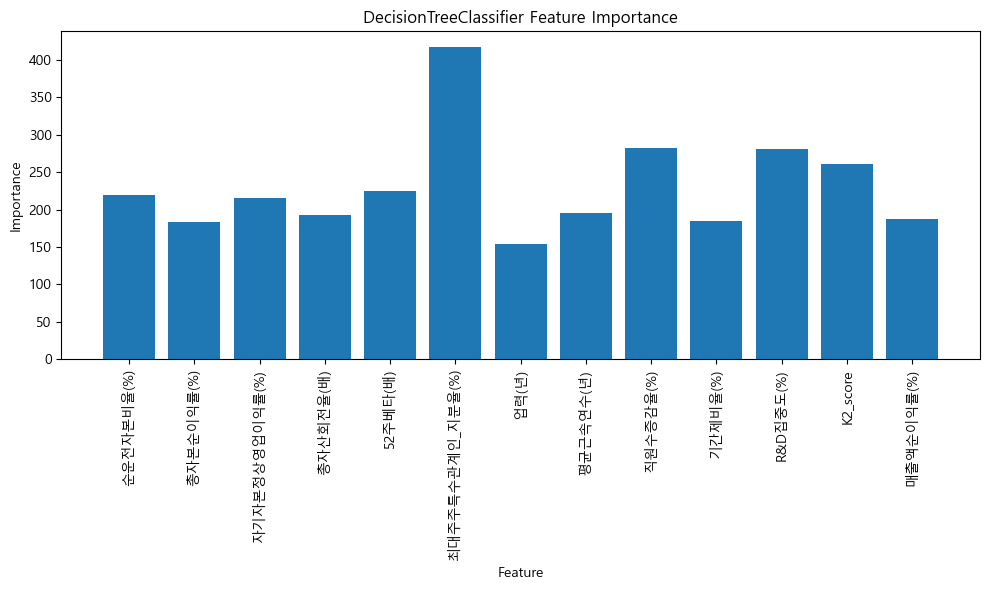

In [112]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

dt_clf = result_df['model'][3]  # DecisionTreeClassifier 모델 선택
feature_importance = dt_clf.feature_importances_

# 각 feature의 중요도를 그래프로 표현
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('DecisionTreeClassifier Feature Importance')
plt.tight_layout()
plt.show()